# Tesseract 

In [31]:
import pytesseract as ts
from PIL import Image
import os

In [32]:
print(os.getcwd())

C:\Users\admin\Documents\test\2021_12_04


In [33]:
#이건 되네 
ts.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [34]:
str = ts.image_to_string(Image.open('./car_number2.png'), lang='kor')

In [35]:
print(str)

# Tesseract 간단한 예제

In [36]:
img = Image.open('./son.png')
img2 = Image.open('./son2.png')

In [37]:
text = ts.image_to_string(img, lang = 'kor')
text2 = ts.image_to_string(img2, lang = 'eng')

print(text)
print(text2)

 

 

민 ( 토 트 넘 ) 이 아 시아 선 수 시 장 가 치 서 압 도 적 인 1 위 에 올 랐 다 .

일 본 매 체 산 케 이 스 포 즈 는 4 일 독 일 죽 구 이 적 전 문 사 이 트 인 트 랜 스 퍼 마 르 크 트 의 자 료 를 인 용 해
현 재 몸 값 이 가 장 높 은 아 시아 선 수 25 명 을 공 개 했 다 . 일 본 선 수 가 12 명 으 로 가 장 많 았 고 , 한 국 과
이란 선 수 가 나 란 히 4 명 씩 포 함 됐 다 .

     

  

Son Heung-min

From Wikipedia, the free encyclopedia



# 차 번호판  

In [59]:
import cv2
import pytesseract as ts
import matplotlib.pyplot as plt 
import numpy as np

## 이미지 불러오기 

In [60]:
img_ori = cv2.imread('./car_number2.png')
height, width, channel = img_ori.shape
print(img_ori.shape)

(306, 739, 3)


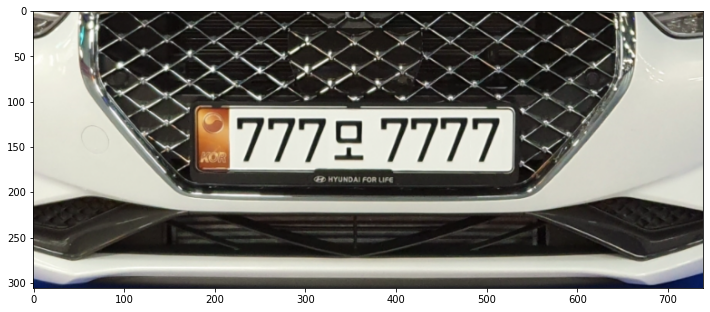

In [61]:
plt.figure(figsize=(12,10))
plt.imshow(img_ori, cmap='gray')

## Convert Image to Grayscale 

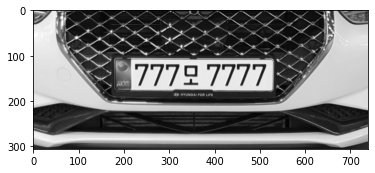

In [62]:
img_gray = cv2.cvtColor(img_ori,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [63]:
#cv2를 이용한 이미지 보기 
cv2.imshow('grascale',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Adaptive Thresholding 

Thresholding을 해주기전 가우시안 블러를 해서 번호판을 더 잘 찾게 만들어 줄수 있다. Tresholding이란 threshold값을 기준으로 정하고 이보다 낮은 값은 0, 높은 값은 255로 변환한다. 즉 흑과 백으로만 사진을 구성하는 것. 

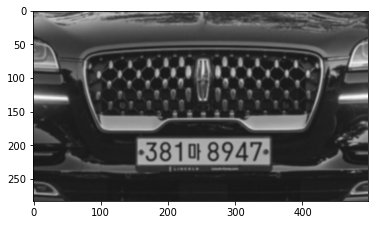

In [64]:
img_blurred = cv2.GaussianBlur(img_gray, ksize=(5,5), sigmaX = 1)

img_blurred_rgb = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)
plt.imshow(test)

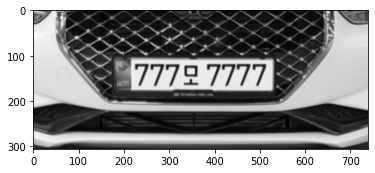

In [70]:
img = cv2.imread('./car_number2.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap = 'gray')

blur_img = cv2.GaussianBlur(gray_img , ksize=(5,5),sigmaX=0)

plt.imshow(blur_img, cmap='gray')

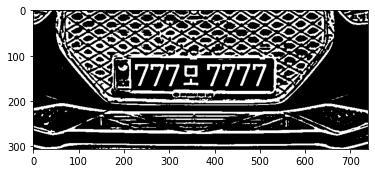

In [149]:
#tresholding
#rgb로 바꾼 이미지를 넣었을때는 안됨 에러남 
#블러처리를 하고나서 하니까 검은색이 더 많아짐 
img_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=21,
    C=9
)
plt.imshow(img_thresh, 'gray')

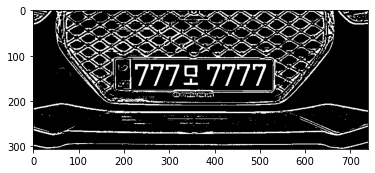

In [150]:
img_thresh2 = cv2.adaptiveThreshold(
    img_gray,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=13,
    C=15
)
plt.imshow(img_thresh2, 'gray')



## Find Contours
Contours란 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선을 연결한 선이다. findContours()는 이런 Contours를 찾는 opencv 메소드이다. 사진 윤곽선 찾기

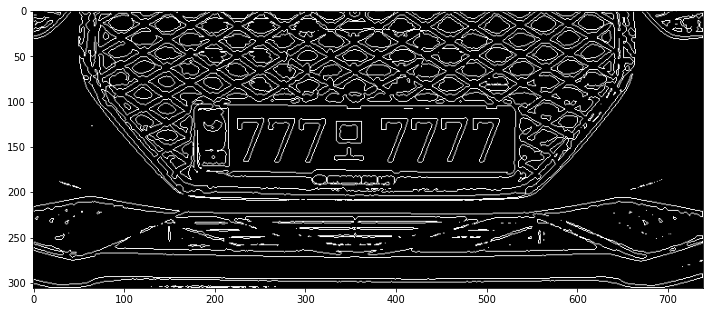

In [151]:
contours, _ = cv2.findContours(
    img_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

#같은 크기의 nparray 생성
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 그리기
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255,255,255)) 

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

In [152]:
print(contours)
print(type(contours))

(array([[[266, 304]],

       [[267, 304]]], dtype=int32), array([[[259, 304]]], dtype=int32), array([[[254, 304]],

       [[255, 304]],

       [[256, 305]],

       [[257, 305]],

       [[257, 304]]], dtype=int32), array([[[238, 304]],

       [[241, 304]],

       [[242, 305]],

       [[245, 305]],

       [[246, 304]],

       [[247, 304]],

       [[248, 305]],

       [[247, 304]]], dtype=int32), array([[[218, 304]],

       [[219, 304]],

       [[220, 305]],

       [[227, 305]],

       [[228, 304]],

       [[229, 304]],

       [[230, 305]],

       [[232, 305]],

       [[233, 304]],

       [[234, 305]],

       [[234, 304]]], dtype=int32), array([[[139, 304]],

       [[142, 304]]], dtype=int32), array([[[130, 304]]], dtype=int32), array([[[170, 303]],

       [[169, 304]],

       [[168, 304]],

       [[169, 304]],

       [[170, 305]],

       [[171, 305]],

       [[172, 304]],

       [[173, 304]],

       [[174, 305]],

       [[183, 305]],

       [[184, 304]],


## Prepare Data
원본 사진과 동일한 크기에다가 찾은 Contours의 좌표를 사각형으로 그려보는 것. 리스트에 contours 딕셔너리 정보를 저장 

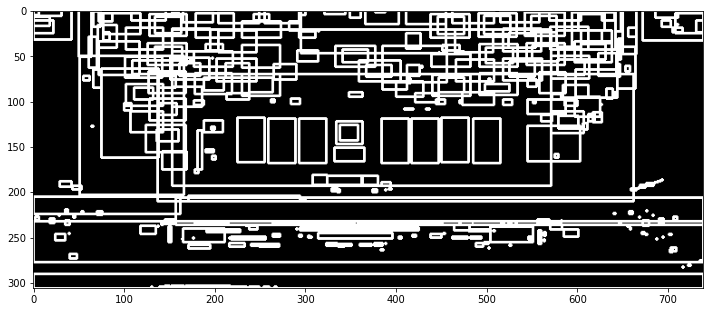

In [153]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=2)
    
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })
    
plt.figure(figsize=(12,10))
plt.imshow(temp_result, cmap='gray')

## Select Candidates by Char Size
번호판 클자인 것 같은 contour들을 추려야한다. 번호판은 숫자들의 손글씨처럼 일정한 비율을 가진다. 이 비율을 이용하면 번호판 같은 contour을 추릴 수 있다. 최소비율0.25, 최대비율1.0으로 설정해 contour의 너비와 높이를 이용해 비율을 구한다. 

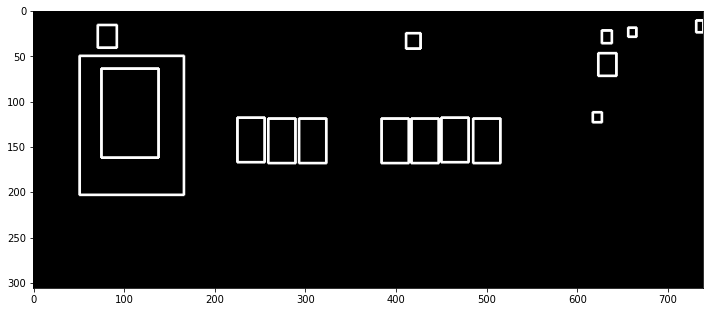

In [163]:
# 이런 값들을 무슨 기준으로 정하는걸까... 
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT=2, 8
MIN_RATIO, MAX_RATIO = 0.6, 1.0  #본래 최소값이 0.25인 예제에서 0.6으로 바꿔서 진행

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for d in possible_contours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
    
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

## Select Candidates by Arrangement of Contours
이 단계에서는  남은 contours 중에 확실하게 번호판을 찾기 위해 기준을 강화.
<br>
<br>
- 번호판 Contours의 width와 height의 비율은 모두 동일하거나 비슷하다.<br>
- 번호판 Contours 사이의 간격은 일정하다.<br>
- 최소 3개 이상 Contours가 인접해 있어야한다. (대한민국 기준)<br>


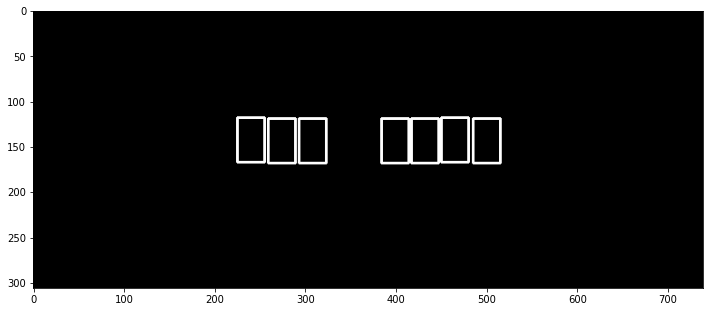

In [168]:
MAX_DIAG_MULTIPLYER = 5
MAX_ANGLE_DIFF = 12.0
MAX_AREA_DIFF = 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue
                
            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])
            
            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)
            
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']
            
            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])
                
        matched_contours_idx.append(d1['idx'])
        
        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue
            
        matched_result_idx.append(matched_contours_idx)
        
        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])
        
        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)
            
        break
        
    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
    
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255,255,255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

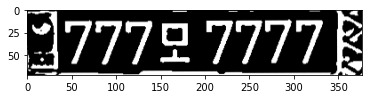

In [169]:
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

777모7777


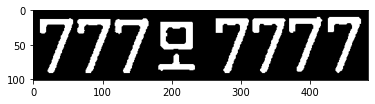

In [170]:
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    
    #pytesseract.pytesseract.tesseract_cmd = 'D:/tesseract/tesseract.exe'
    chars = ts.image_to_string(img_result, lang='kor', config='--psm 7 --oem 0')
    
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    print(result_chars)
    plate_chars.append(result_chars)

    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')

777모7777


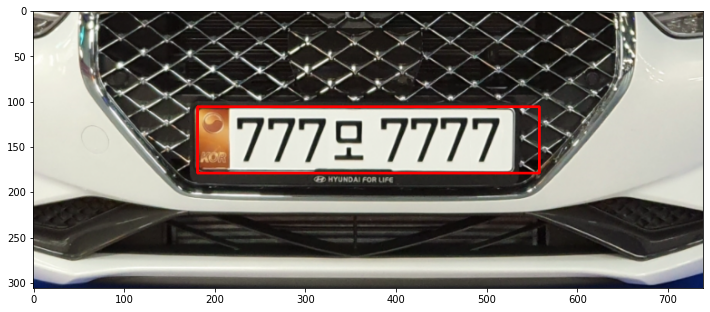

In [171]:
info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

print(chars)

img_out = img_ori.copy()

cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

cv2.imwrite(chars + '.jpg', img_out)

plt.figure(figsize=(12, 10))
plt.imshow(img_out)